# Rathmines - NO2 Predictions Sensitivity Test

# Import all necessary packages and libraries

In [57]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import FactorAnalysis
# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, explained_variance_score, max_error

from time import process_time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError

from sklearn.neural_network import MLPRegressor

# Import Data and remove uneccesary columns

In [58]:
df = pd.read_csv('C:\\Users\\User\\Final Year Project/Rathmines_FileforML.csv', thousands=',', low_memory=False)

In [59]:
df = df.dropna(axis=0)

In [60]:
display(df)

,Date,Hour,indrain,rain,indtemp,temp,indwetb,wetb,dewpt,vappr,...,vis,clht,clamt,NOX,NO,NO2,Ozone,SO2,PM25,PM10
6142,22/11/2017 12:00,1,0,0.6,0,8.8,0,8.7,8.5,11.2,...,5000,12,8,31.90,2.13,28.65,46.4,3.50,2.7,3.3
6143,22/11/2017 13:00,2,0,0.4,0,9.0,0,8.9,8.7,11.3,...,4000,14,8,44.89,6.75,34.38,46.2,3.50,4.8,5.5
6144,22/11/2017 14:00,3,0,0.2,0,9.1,0,9.0,8.9,11.4,...,8000,6,8,47.37,4.63,40.30,35.0,3.20,6.9,7.8
6145,22/11/2017 15:00,4,0,0.2,0,9.1,0,9.0,8.9,11.4,...,8000,6,8,64.18,6.75,54.05,17.8,3.50,9.6,10.8
6146,22/11/2017 16:00,5,0,0.5,0,7.0,0,6.9,6.7,9.9,...,8000,6,8,67.81,5.88,58.64,12.4,3.70,10.2,11.2
6147,22/11/2017 17:00,6,0,0.1,0,6.8,0,6.6,6.4,9.6,...,9000,4,8,53.86,5.13,46.03,7.6,3.70,9.5,10.2
6148,22/11/2017 18:00,7,0,0.8,0,6.5,0,6.4,6.3,9.5,...,6000,4,8,50.42,5.63,41.83,5.6,3.70,13.5,14.5
6149,22/11/2017 19:00,8,0,0.9,0,5.8,0,5.7,5.5,9.1,...,8000,4,8,54.05,8.63,40.87,6.6,3.70,18.1,18.8
6150,22/11/2017 20:00,9,0,1.5,0,4.7,0,4.5,4.2,8.3,...,7000,5,8,34.57,4.13,28.27,26.2,3.70,8.8,8.9
6151,22/11/2017 21:00,10,0,0.2,0,4.4,0,4.2,3.9,8.1,...,9000,10,8,22.54,2.38,18.91,39.6,4.30,8.0,8.3


In [66]:
df.drop('indrain', axis=1, inplace=True)

In [67]:
df.drop('indwetb', axis=1, inplace=True)

In [68]:
df.drop('indtemp', axis=1, inplace=True)

In [69]:
df.drop('indwdsp', axis=1, inplace=True)

In [70]:
df.drop('indwddir', axis=1, inplace=True)

In [71]:
#Sanity Check
df.head(5)

,Date,Hour,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,...,vis,clht,clamt,NOX,NO,NO2,Ozone,SO2,PM25,PM10
6142,22/11/2017 12:00,1,0.6,8.8,8.7,8.5,11.2,99,983.5,10,...,5000,12,8,31.90,2.13,28.65,46.4,3.5,2.7,3.3
6143,22/11/2017 13:00,2,0.4,9.0,8.9,8.7,11.3,99,983.2,4,...,4000,14,8,44.89,6.75,34.38,46.2,3.5,4.8,5.5
6144,22/11/2017 14:00,3,0.2,9.1,9.0,8.9,11.4,99,983.3,4,...,8000,6,8,47.37,4.63,40.30,35.0,3.2,6.9,7.8
6145,22/11/2017 15:00,4,0.2,9.1,9.0,8.9,11.4,99,982.5,4,...,8000,6,8,64.18,6.75,54.05,17.8,3.5,9.6,10.8
6146,22/11/2017 16:00,5,0.5,7.0,6.9,6.7,9.9,99,982.1,6,...,8000,6,8,67.81,5.88,58.64,12.4,3.7,10.2,11.2


In [73]:
df.dtypes #Look at the datatypes

Date      object
Hour       int64
rain     float64
temp     float64
wetb     float64
dewpt    float64
vappr    float64
rhum       int64
msl      float64
wdsp       int64
wddir      int64
ww         int64
w          int64
sun      float64
vis        int64
clht       int64
clamt      int64
NOX      float64
NO       float64
NO2      float64
Ozone    float64
SO2      float64
PM25     float64
PM10     float64
dtype: object

In [74]:
#Change the datatype of the date column (used for selecting timeframes later)
df['Date'] = df['Date'].astype('datetime64') 

In [75]:
df.dtypes

Date     datetime64[ns]
Hour              int64
rain            float64
temp            float64
wetb            float64
dewpt           float64
vappr           float64
rhum              int64
msl             float64
wdsp              int64
wddir             int64
ww                int64
w                 int64
sun             float64
vis               int64
clht              int64
clamt             int64
NOX             float64
NO              float64
NO2             float64
Ozone           float64
SO2             float64
PM25            float64
PM10            float64
dtype: object

In [77]:
#Positive pollutant values only
Posdf = df[(df['SO2'] >= 0) & (df['Ozone'] >= 0) & (df['NO2'] >= 0) & (df['NO'] >= 0) & (df['NOX'] >= 0) & (df['PM25'] >= 0) & (df['PM10'] >= 0)]

In [78]:
df.drop('Date', axis=1, inplace=True)

In [79]:
Posdf.drop('Date', axis=1, inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [80]:
print('Length of Original cleaned df: {}'.format(len(df)))
print('Length of positive cleaned df: {}'.format(len(Posdf)))

Length of Original cleaned df: 12595
Length of positive cleaned df: 12080


# Adjust data to avoid zero's

In [81]:
Posdf['Hour'] = Posdf['Hour']+1.00
Posdf['rain'] = Posdf['rain']+1.00
Posdf['temp'] = Posdf['temp']+5.50
Posdf['vappr'] = Posdf['vappr']+1.00
Posdf['rhum'] = Posdf['rhum']+1.00
Posdf['wetb'] = Posdf['wetb']+5.60
Posdf['dewpt'] = Posdf['dewpt']+10.80
Posdf['msl'] = Posdf['msl']/1000
Posdf['NOX'] = Posdf['NOX']+1.00
Posdf['NO'] = Posdf['NO']+1.00
Posdf['NO2'] = Posdf['NO2']+1.00
Posdf['SO2'] = Posdf['SO2']+1.00
Posdf['Ozone'] = Posdf['Ozone']+1.00
Posdf['PM10'] = Posdf['PM10']+1.00
Posdf['PM25'] = Posdf['PM25']+1.00


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [82]:
Posdf.describe()

,Hour,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,...,vis,clht,clamt,NOX,NO,NO2,Ozone,SO2,PM25,PM10
count,12080.000000,12080.000000,12080.000000,12080.000000,12080.000000,12080.000000,12080.000000,12080.000000,12080.000000,12080.000000,...,12080.000000,12080.000000,12080.000000,12080.000000,12080.000000,12080.000000,12080.000000,12080.000000,12080.000000,12080.000000
mean,12.448675,1.102906,15.604313,14.006929,17.332624,11.071407,80.772765,1.013391,9.682368,200.884934,...,29647.160596,300.114073,5.559768,32.607135,8.256675,21.538309,49.758096,2.818547,11.044280,13.703228
std,6.915897,0.431111,4.991816,4.219268,4.223316,2.966190,12.556781,0.012757,4.734146,82.114433,...,14071.127087,401.461442,2.242609,39.445527,18.290070,16.165343,21.408540,1.614692,11.329389,11.696455
min,1.000000,1.000000,5.700000,5.600000,4.100000,4.600000,26.000000,0.972000,1.000000,10.000000,...,300.000000,1.000000,0.000000,1.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,1.000000,11.900000,10.800000,14.100000,8.800000,73.000000,1.005400,6.000000,140.000000,...,20000.000000,27.750000,4.000000,13.400000,2.500000,9.800000,36.000000,1.800000,4.700000,7.100000
50%,12.000000,1.000000,15.000000,13.700000,17.200000,10.600000,83.000000,1.015300,9.000000,220.000000,...,30000.000000,60.000000,7.000000,23.500000,4.400000,17.600000,50.800000,2.330000,7.700000,10.400000
75%,18.000000,1.000000,19.100000,17.100000,20.300000,12.900000,90.000000,1.022200,12.000000,260.000000,...,40000.000000,250.000000,7.000000,38.410000,7.600000,28.500000,63.800000,3.390000,13.300000,16.300000
max,24.000000,9.400000,31.800000,25.700000,29.600000,22.700000,101.000000,1.044500,34.000000,360.000000,...,75000.000000,999.000000,8.000000,1088.200000,592.800000,184.000000,154.600000,30.260000,171.100000,174.500000


In [83]:
#Make three different feature setups, this time NO2 is the target pollutant to predict
Basedf = Posdf[['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone', 'NO2']].copy()
Pollutantdf = Posdf[['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'PM10', 'SO2', 'Ozone', 'NO2']].copy()
dfnowd = Posdf[['Hour', 'rain', 'temp', 'msl', 'PM10', 'SO2', 'Ozone', 'NO2']].copy()

In [84]:
#Sanity check
display(Pollutantdf)

,Hour,rain,temp,msl,wdsp,wddir,PM10,SO2,Ozone,NO2
6142,2.0,1.6,14.3,0.9835,10,360,4.3,4.50,47.4,29.65
6143,3.0,1.4,14.5,0.9832,4,360,6.5,4.50,47.2,35.38
6144,4.0,1.2,14.6,0.9833,4,200,8.8,4.20,36.0,41.30
6145,5.0,1.2,14.6,0.9825,4,290,11.8,4.50,18.8,55.05
6146,6.0,1.5,12.5,0.9821,6,340,12.2,4.70,13.4,59.64
6147,7.0,1.1,12.3,0.9815,6,340,11.2,4.70,8.6,47.03
6148,8.0,1.8,12.0,0.9808,5,340,15.5,4.70,6.6,42.83
6149,9.0,1.9,11.3,0.9809,7,310,19.8,4.70,7.6,41.87
6150,10.0,2.5,10.2,0.9813,12,300,9.9,4.70,27.2,29.27
6151,11.0,1.2,9.9,0.9819,12,290,9.3,5.30,40.6,19.91


In [85]:
#Testing that NO2 will be the target feature for predictions (will be used in algorithms)
column_list = Basedf.columns.values.tolist()

print(column_list)

Name = column_list.pop(-1)
print(Name)

print(column_list)

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone', 'NO2']
NO2
['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone']


# Functions which will be called in process of Algorithm work

In [86]:
#Needed for running algorithms
class AddColumnNames(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(data=X, columns=self.columns)

In [87]:
#Needed for running algorithms
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X[self.columns]

In [88]:
#Function to calculate statistical arbiters
def evaluate_model(X_test, y_test, model):
    
    # compute prediction for the test set
    _predicted_values = model.predict(X_test)
    # compute metrics
    _mse = mean_squared_error(y_test, _predicted_values)
    _mae = mean_absolute_error(y_test, _predicted_values)
    _r2 = r2_score(y_test, _predicted_values)
    _meae = median_absolute_error(y_test, _predicted_values)
    _evs = explained_variance_score(y_test, _predicted_values)
    _me = max_error(y_test, _predicted_values)      
    return _mse, _mae, _r2, _meae, _evs, _me

# Random Forest

In [89]:
%%time

def RandomForest(Name, N_Year, N, printCV, printgraph, N_Features, Max_Depth, ratio, Addfeature):
    
    Data = N_Year
    
    # store a list with the names of all predictors we'll try PM10 first
    names_all = [c for c in Data if c not in ['NO2']]

    column_list = Data.columns.values.tolist()
    Removed        = column_list.pop(-1)
    
    # define column groups with the same data preparation
    names_outliers = column_list
    print(names_outliers)
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['NO2']
    X = Data.drop('NO2', axis=1).values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    #X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                        ('regresson', RandomForestRegressor(n_estimators=100))])

    
    #print(len(Data))
    
    
    N_FEATURES_OPTIONS = [N_Features]
    MAX_DEPTH_OPTIONS = [Max_Depth]

    param_grid = [
        {
            'reduce_dim': [PCA(iterated_power=7)],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
            'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [FastICA( algorithm='deflation')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
    ]    

    search = GridSearchCV(pipe, param_grid, cv=10, iid = False, refit=True)
    search.fit(X_train, y_train)

    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)
    
        
 
    # store the best params and best model for later use
    RF_best_params = search.best_params_
    RF_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = RandomForestRegressor()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure
    
    RF_mse, RF_mae, RF_r2, RF_meae, RF_evs, RF_me = evaluate_model(X_test, y_test, RF_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    Add = np.array([Addfeature])
    MSE  = np.array([RF_mse])
    MAE  = np.array([RF_mae])
    R2   = np.array([RF_r2])
    MEAE = np.array([RF_meae])
    ME   = np.array([RF_me])
    
    #Predictions = model.predict(X_test)
    Modeldf = pd.DataFrame(list(zip(Title, Range, Features, Depth, Split, Add, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Max Depth', 'Test-Train Split', 'Feature Added', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return Modeldf

Wall time: 0 ns


# Gradient Boosting

In [90]:
%%time
def GradientBoosting(Name, N_Year, N, printCV, printgraph, N_Features, Max_Depth, ratio, Addfeature):
    Data = N_Year
    
    # store a list with the names of all predictors we'll try PM10 first
    names_all = [c for c in Data if c not in ['NO2']]

    column_list = Data.columns.values.tolist()
    Removed        = column_list.pop(-1)
    
    # define column groups with the same data preparation
    names_outliers = column_list
    print(names_outliers)
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['NO2']
    X = Data.drop('NO2', axis=1).values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    #X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                           ('reduce_dim', 'passthrough'),
                           ('regresson', GradientBoostingRegressor())])



    N_FEATURES_OPTIONS = [N_Features]
    MAX_DEPTH_OPTIONS = [Max_Depth]


    param_grid = [
         {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [PCA(iterated_power=7)],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
            'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        }


    ]
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)
    
    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

    # store the best params and best model for later use
    GB_best_params = search.best_params_
    GB_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = GradientBoostingRegressor()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    GB_mse, GB_mae, GB_r2, GB_meae, GB_evs, GB_me = evaluate_model(X_test, y_test, GB_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    Add = np.array([Addfeature])
    MSE  = np.array([GB_mse])
    MAE  = np.array([GB_mae])
    R2   = np.array([GB_r2])
    MEAE = np.array([GB_meae])
    ME   = np.array([GB_me])
    
    #Predictions = model.predict(X_test)
    Modeldf = pd.DataFrame(list(zip(Title, Range, Features, Depth, Split, Add, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Max Depth', 'Test-Train Split', 'Feature Added', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return Modeldf

Wall time: 0 ns


# ANN

In [91]:
%%time
def ANN(Name, N_Year, N, printCV, printgraph, N_Features, ratio, Addfeature):
    Data = N_Year
    
    # store a list with the names of all predictors we'll try PM10 first
    names_all = [c for c in Data if c not in ['NO2']]

    column_list = Data.columns.values.tolist()
    Removed        = column_list.pop(-1)
    
    # define column groups with the same data preparation
    names_outliers = column_list
    print(names_outliers)
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['NO2']
    X = Data.drop('NO2', axis=1).values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    #X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', MLPRegressor ())])



    ALPHA = [0.001, 0.01, 0.1, 1, 10, 100], 
    HIDDEN_LAYER_SIZES = [(6),(11,11),(7,7,7)] 
    SOLVER = ['adam'] 
    ACTIVATION = ['relu','tanh','identity','logistic'] 
    LEARNING_RATE = ['constant','invscaling','adaptive']
    N_FEATURES_OPTIONS = [N_Features]
    MAX_ITER = [500]

    param_grid = [
         {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },

    ]
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)
    

    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

     # store the best params and best model for later use
    MLP_best_params = search.best_params_
    MLP_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = MLPRegressor()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    MLP_mse, MLP_mae, MLP_r2, MLP_meae, MLP_evs, MLP_me = evaluate_model(X_test, y_test, MLP_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    #Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    Add = np.array([Addfeature])
    MSE  = np.array([MLP_mse])
    MAE  = np.array([MLP_mae])
    R2   = np.array([MLP_r2])
    MEAE = np.array([MLP_meae])
    ME   = np.array([MLP_me])
    
    #Predictions = model.predict(X_test)
    Modeldf = pd.DataFrame(list(zip(Title, Range, Features, Split, Add, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Test-Train Split', 'Feature Added', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return Modeldf

Wall time: 0 ns


# Linear Regression

In [92]:
%%time
def LRegress(Name, N_Year, N, printCV, printgraph, N_Features, ratio, Addfeature):    
    Data = N_Year
    
    # store a list with the names of all predictors we'll try PM10 first
    names_all = [c for c in Data if c not in ['NO2']]

    column_list = Data.columns.values.tolist()
    Removed        = column_list.pop(-1)
    
    # define column groups with the same data preparation
    names_outliers = column_list
    print(names_outliers)
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['NO2']
    X = Data.drop('NO2', axis=1).values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
    )
   
    #X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', LinearRegression())])



    N_FEATURES_OPTIONS = [N_Features]
    NORMALIZE_OPTIONS = [False, True]

    param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
        'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [FastICA( algorithm='deflation')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS
    }
]

    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)


    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

     # store the best params and best model for later use
    LR_best_params = search.best_params_
    LR_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = LinearRegression()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    LR_mse, LR_mae, LR_r2, LR_meae, LR_evs, LR_me = evaluate_model(X_test, y_test, LR_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    #Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    Add = np.array([Addfeature])
    MSE  = np.array([LR_mse])
    MAE  = np.array([LR_mae])
    R2   = np.array([LR_r2])
    MEAE = np.array([LR_meae])
    ME   = np.array([LR_me])
    
    #Predictions = model.predict(X_test)
    Modeldf = pd.DataFrame(list(zip(Title, Range, Features, Split, Add, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Test-Train Split', 'Feature Added', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return Modeldf

Wall time: 0 ns


# SVM

In [93]:
%%time
def SVM(Name, N_Year, N, printCV, printgraph, N_Features, ratio, Addfeature):
    Data = N_Year
    
    # store a list with the names of all predictors we'll try PM10 first
    names_all = [c for c in Data if c not in ['NO2']]
    
    column_list = Data.columns.values.tolist()
    Removed     = column_list.pop(-1)
    
    # define column groups with the same data preparation
    names_outliers = column_list
    print(names_outliers)
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['NO2']
    X = Data.drop('NO2', axis=1).values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    #X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', SVR())])



    KERNEL = ['linear']
    C = [300]
    GAMMA = ['auto']
    N_FEATURES_OPTIONS = [N_Features]


    param_grid = [
         {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        }
    ]
    
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)
    

    
    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

     # store the best params and best model for later use
    SVR_best_params = search.best_params_
    SVR_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = SVR()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    SVR_mse, SVR_mae, SVR_r2, SVR_meae, SVR_evs, SVR_me = evaluate_model(X_test, y_test, SVR_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    #Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    Add = np.array([Addfeature])
    MSE  = np.array([SVR_mse])
    MAE  = np.array([SVR_mae])
    R2   = np.array([SVR_r2])
    MEAE = np.array([SVR_meae])
    ME   = np.array([SVR_me])
    
    #Predictions = model.predict(X_test)
    Modeldf = pd.DataFrame(list(zip(Title, Range, Features, Split, Add, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Test-Train Split', 'Feature Added', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return Modeldf

Wall time: 0 ns


# Run Feature Setup permutations

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone']
Best CV score = 0.578:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='arpack', n_components=7, n_iter=5, random_state=None,
             tol=0.0), 'reduce_dim__n_components': 7}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


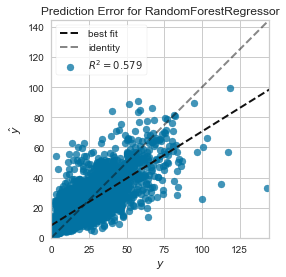

Wall time: 5min 48s


In [94]:
%%time
RF_Base = RandomForest('Random Forest', Basedf, '2017-2019', 0, 0, 7, 12, 0.3, 'None')

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'PM10', 'SO2', 'Ozone']
Best CV score = 0.683:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='arpack', n_components=9, n_iter=5, random_state=None,
             tol=0.0), 'reduce_dim__n_components': 9}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


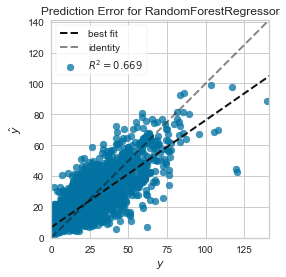

Wall time: 8min 41s


In [95]:
%%time
RF_NSO2 = RandomForest('Random Forest', Pollutantdf, '2017-2019', 0, 0, 9, 12, 0.3, 'PM10, SO2 and Ozone')

['Hour', 'rain', 'temp', 'msl', 'PM10', 'SO2', 'Ozone']
Best CV score = 0.657:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='arpack', n_components=7, n_iter=5, random_state=None,
             tol=0.0), 'reduce_dim__n_components': 7}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


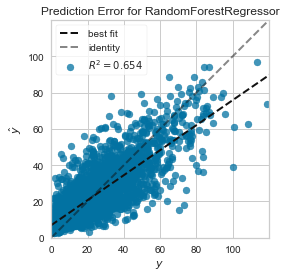

Wall time: 6min 46s


In [96]:
%%time
RF_NOWD = RandomForest('Random Forest', dfnowd, '2017-2019', 0, 0, 7, 12, 0.3, 'NO WIND')

In [112]:
RFTime = ['5m 48s', '8m 41s', '6m 46s']

RFData = pd.concat([RF_Base, RF_NSO2, RF_NOWD])
RFData['Run Time'] = RFTime 
display(RFData)

,Algorithm,Year,N Features,Max Depth,Test-Train Split,Feature Added,MSE,MAE,R2,MEAE,ME,Run Time
0,Random Forest,2017-2019,7,12,0.3,None,107.632528,7.216572,0.581719,5.27415,117.6834,5m 48s
0,Random Forest,2017-2019,9,12,0.3,"PM10, SO2 and Ozone",83.915680,6.509932,0.661781,4.81885,96.2750,8m 41s
0,Random Forest,2017-2019,7,12,0.3,NO WIND,89.980048,6.949464,0.664774,5.21005,59.7616,6m 46s


['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone']
Best CV score = 0.526:
Best parameters:  {'reduce_dim': PCA(copy=True, iterated_power=7, n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'reduce_dim__n_components': 7, 'regresson__max_depth': 12}


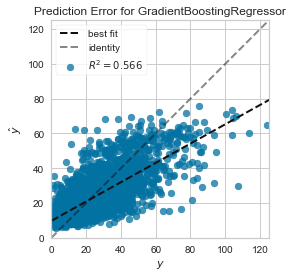

Wall time: 2min 8s


In [97]:
%%time
GB_Base = GradientBoosting('Gradient Boosting', Basedf, '2017-2019', 0, 0, 7, 12, 0.3, 'None')

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'PM10', 'SO2', 'Ozone']
Best CV score = 0.654:
Best parameters:  {'reduce_dim': RFE(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                  gamma='auto', kernel='linear', max_iter=-1, shrinking=True,
                  tol=0.001, verbose=False),
    n_features_to_select=9, step=1, verbose=0), 'reduce_dim__n_features_to_select': 9, 'regresson__max_depth': 12}


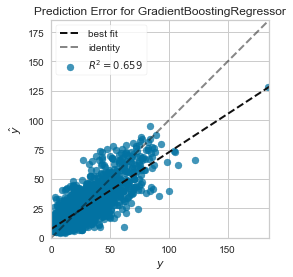

Wall time: 2min 58s


In [98]:
%%time
GB_NSO2 = GradientBoosting('Gradient Boosting', Pollutantdf, '2017-2019', 0, 0, 9, 12, 0.3, 'PM10, SO2 and Ozone')

['Hour', 'rain', 'temp', 'msl', 'PM10', 'SO2', 'Ozone']
Best CV score = 0.628:
Best parameters:  {'reduce_dim': FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=7,
               noise_variance_init=None, random_state=0,
               svd_method='randomized', tol=0.01), 'reduce_dim__n_components': 7}


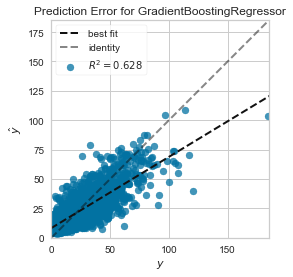

Wall time: 1min 47s


In [99]:
%%time
GB_NOWD = GradientBoosting('Gradient Boosting', dfnowd, '2017-2019', 0, 0, 7, 12, 0.3, 'NO WIND')

In [113]:
GBTime = ['2m 8s', '2m 58s', '1m 47s']

GBData = pd.concat([GB_Base, GB_NSO2, GB_NOWD])
GBData['Run Time'] = GBTime 
display(GBData)

,Algorithm,Year,N Features,Max Depth,Test-Train Split,Feature Added,MSE,MAE,R2,MEAE,ME,Run Time
0,Gradient Boosting,2017-2019,7,12,0.3,None,112.274604,7.399758,0.573276,5.163227,86.001488,2m 8s
0,Gradient Boosting,2017-2019,9,12,0.3,"PM10, SO2 and Ozone",95.654935,6.908735,0.641792,4.945662,80.391497,2m 58s
0,Gradient Boosting,2017-2019,7,12,0.3,NO WIND,107.619177,7.541613,0.606356,5.919413,120.061988,1m 47s


['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone']


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best CV score = 0.557:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='randomized', n_components=7, n_iter=5,
             random_state=None, tol=0.0), 'reduce_dim__n_components': 7}


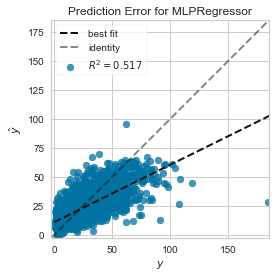

Wall time: 1min 5s


In [100]:
%%time
MLP_Base = ANN('ANN', Basedf, '2017-2019', 0, 0, 7, 0.3, 'None')

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'PM10', 'SO2', 'Ozone']


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best CV score = 0.657:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='randomized', n_components=9, n_iter=5,
             random_state=None, tol=0.0), 'reduce_dim__n_components': 9}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


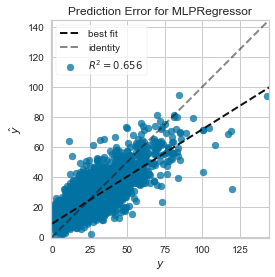

Wall time: 1min 10s


In [101]:
%%time
MLP_NSO2 = ANN('ANN', Pollutantdf, '2017-2019', 0, 0, 9, 0.3, 'PM10, SO2 and Ozone')

['Hour', 'rain', 'temp', 'msl', 'PM10', 'SO2', 'Ozone']


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best CV score = 0.648:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='arpack', n_components=7, n_iter=5, random_state=None,
             tol=0.0), 'reduce_dim__n_components': 7}


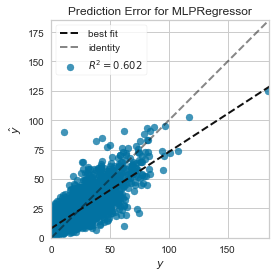

Wall time: 1min 7s


In [102]:
%%time
MLP_NOWD = ANN('ANN', dfnowd, '2017-2019', 0, 0, 7, 0.3, 'NO WIND')

In [114]:
MLPTime = ['1m 5s', '1m 10s', '1m 7s']

MLPData = pd.concat([MLP_Base, MLP_NSO2, MLP_NOWD])
MLPData['Run Time'] = MLPTime 
display(MLPData)

,Algorithm,Year,N Features,Test-Train Split,Feature Added,MSE,MAE,R2,MEAE,ME,Run Time
0,ANN,2017-2019,7,0.3,None,120.667028,7.699551,0.550746,5.738958,154.370514,1m 5s
0,ANN,2017-2019,9,0.3,"PM10, SO2 and Ozone",83.910569,6.744658,0.682134,5.275488,82.087469,1m 10s
0,ANN,2017-2019,7,0.3,NO WIND,89.818357,7.042070,0.631141,5.525123,107.214209,1m 7s


['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone']


C:\Users\User\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best CV score = 0.444:
Best parameters:  {'reduce_dim': PCA(copy=True, iterated_power=7, n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'reduce_dim__n_components': 7, 'regresson__normalize': True}


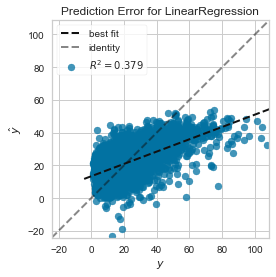

Wall time: 2min 17s


In [106]:
%%time
LR_Base = LRegress('Linear Regression', Basedf, '2017-2019', 0, 0, 7, 0.3, 'None')

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'PM10', 'SO2', 'Ozone']
Best CV score = 0.574:
Best parameters:  {'reduce_dim': PCA(copy=True, iterated_power=7, n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'reduce_dim__n_components': 9, 'regresson__normalize': False}


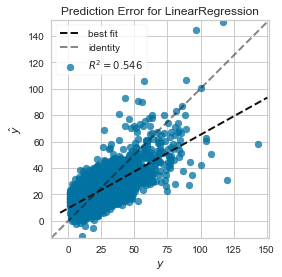

Wall time: 3min 6s


In [109]:
%%time
LR_NSO2 = LRegress('Linear Regression', Pollutantdf, '2017-2019', 0, 0, 9, 0.3, 'PM10, SO2 and Ozone')

['Hour', 'rain', 'temp', 'msl', 'PM10', 'SO2', 'Ozone']
Best CV score = 0.549:
Best parameters:  {'reduce_dim': PCA(copy=True, iterated_power=7, n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'reduce_dim__n_components': 7, 'regresson__normalize': False}


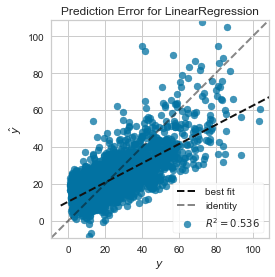

Wall time: 2min 34s


In [110]:
%%time
LR_NOWD = LRegress('Linear Regression', dfnowd, '2017-2019', 0, 0, 7, 0.3, 'NO WIND')

In [115]:
LRTime = ['2m 17s', '3m 6s', '2m 34s']

LRData = pd.concat([LR_Base, LR_NSO2, LR_NOWD])
LRData['Run Time'] = LRTime 
display(LRData)

,Algorithm,Year,N Features,Test-Train Split,Feature Added,MSE,MAE,R2,MEAE,ME,Run Time
0,Linear Regression,2017-2019,7,0.3,None,134.715823,8.728383,0.464764,6.957248,71.794974,2m 17s
0,Linear Regression,2017-2019,9,0.3,"PM10, SO2 and Ozone",116.533435,7.966767,0.559012,6.264770,109.908710,3m 6s
0,Linear Regression,2017-2019,7,0.3,NO WIND,108.467904,8.038026,0.560262,6.611905,58.991481,2m 34s


['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone']


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best CV score = 0.522:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='randomized', n_components=7, n_iter=5,
             random_state=None, tol=0.0), 'reduce_dim__n_components': 7}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


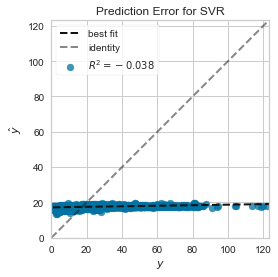

Wall time: 38.6 s


In [103]:
%%time
SVM_Base = SVM('SVM', Basedf, '2017-2019', 0, 0, 7, 0.3, 'None')

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'PM10', 'SO2', 'Ozone']


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best CV score = 0.594:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='randomized', n_components=9, n_iter=5,
             random_state=None, tol=0.0), 'reduce_dim__n_components': 9}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


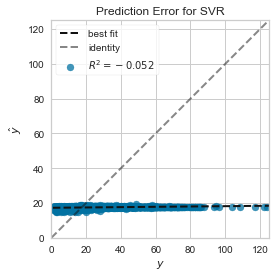

Wall time: 45.7 s


In [104]:
%%time
SVM_NSO2 = SVM('SVM', Pollutantdf, '2017-2019', 0, 0, 9, 0.3, 'PM10, SO2 and Ozone')

['Hour', 'rain', 'temp', 'msl', 'PM10', 'SO2', 'Ozone']


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best CV score = 0.586:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='arpack', n_components=7, n_iter=5, random_state=None,
             tol=0.0), 'reduce_dim__n_components': 7}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


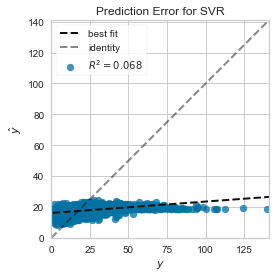

Wall time: 38.1 s


In [105]:
%%time
SVM_NOWD = SVM('SVM', dfnowd, '2017-2019', 0, 0, 7, 0.3, 'NO WIND')

In [116]:
SVMTime = ['39s', '46s', '38s']

SVMData = pd.concat([SVM_Base, SVM_NSO2, SVM_NOWD])
SVMData['Run Time'] = SVMTime 
display(SVMData)

,Algorithm,Year,N Features,Test-Train Split,Feature Added,MSE,MAE,R2,MEAE,ME,Run Time
0,SVM,2017-2019,7,0.3,None,126.850457,7.840487,0.522361,5.742172,108.268104,39s
0,SVM,2017-2019,9,0.3,"PM10, SO2 and Ozone",99.211270,6.973999,0.622312,5.100923,86.653841,46s
0,SVM,2017-2019,7,0.3,NO WIND,105.665382,7.290558,0.598043,5.442403,81.506904,38s


# Combine all the results and compare

Explanation of "Feature Added" column (called "Feature Setup" in dissertation): <br>
"None" means that just meteorological and Ozone data was inputed into the algorithm. This is comparable to the inputs in the Mace Head series of algorithms. In the dissertation this was referred to as "baseline" which is much clearer. <br>
"PM10, SO2 and Ozone" means the base features as well as PM10 and SO2 features were inputted. I mistakenly added in that Ozone was added but that pollutant was already in the base features (so ignore it).<br>
"NO WIND" means the same as "PM10 and SO2" except both wind speed and direction were removed as input features. 

In [117]:
CombinedStats = pd.concat([RFData, GBData, MLPData, LRData, SVMData])


display(CombinedStats)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Algorithm,Feature Added,MAE,ME,MEAE,MSE,Max Depth,N Features,R2,Run Time,Test-Train Split,Year
0,Random Forest,None,7.216572,117.683400,5.274150,107.632528,12.0,7,0.581719,5m 48s,0.3,2017-2019
0,Random Forest,"PM10, SO2 and Ozone",6.509932,96.275000,4.818850,83.915680,12.0,9,0.661781,8m 41s,0.3,2017-2019
0,Random Forest,NO WIND,6.949464,59.761600,5.210050,89.980048,12.0,7,0.664774,6m 46s,0.3,2017-2019
0,Gradient Boosting,None,7.399758,86.001488,5.163227,112.274604,12.0,7,0.573276,2m 8s,0.3,2017-2019
0,Gradient Boosting,"PM10, SO2 and Ozone",6.908735,80.391497,4.945662,95.654935,12.0,9,0.641792,2m 58s,0.3,2017-2019
0,Gradient Boosting,NO WIND,7.541613,120.061988,5.919413,107.619177,12.0,7,0.606356,1m 47s,0.3,2017-2019
0,ANN,None,7.699551,154.370514,5.738958,120.667028,NaN,7,0.550746,1m 5s,0.3,2017-2019
0,ANN,"PM10, SO2 and Ozone",6.744658,82.087469,5.275488,83.910569,NaN,9,0.682134,1m 10s,0.3,2017-2019
0,ANN,NO WIND,7.042070,107.214209,5.525123,89.818357,NaN,7,0.631141,1m 7s,0.3,2017-2019
0,Linear Regression,None,8.728383,71.794974,6.957248,134.715823,NaN,7,0.464764,2m 17s,0.3,2017-2019
